In [18]:
import torch, torchvision
from visdom import Visdom
from torch import nn, optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [14]:
T = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_data = torchvision.datasets.MNIST('./mnist_data', transform=T, download=True)
data_loader = torch.utils.data.DataLoader(mnist_data, batch_size=128, shuffle=True)

In [15]:
# main neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)

        self.relu = nn.ReLU()

    def forward(self, images):
        x = images.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [20]:
# training

model = NN()
cec = nn.CrossEntropyLoss()
params = model.parameters()
optimizer = optim.Adam(params=params, lr=0.09)
epochs = 3
iterations = 0
Loss = []
for e in range(epochs):
    for i,(images,labels) in enumerate(data_loader):
        images = Variable(images)
        labesl = Variable(labels)
        output = model(images)

        model.zero_grad()
        loss = cec(output, labels)
        Loss.append(loss.item())
        loss.backward()
        optimizer.step()
        

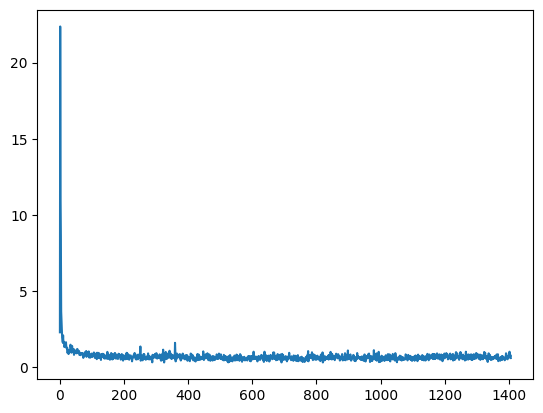

In [21]:
plt.plot(Loss)